***Méthodes numériques:Module 1.***
*********************************
Modélisation du vol d'une fusée.
==
### But #


Calculer, selon la méthode d'Euler, la trajectoire et la vitesse d'une fusée qui possède une certaine masse de carburant initiale et qui la consume à un taux constant, de son lancer jusqu'à l'impact avec le sol.

In [153]:
import numpy
from matplotlib import pyplot
%matplotlib inline

### Principe #


Les équations différentielles de ce problème sont:  
*$$\frac{dh}{dt}=v$$ 
*$$\frac{dv}{dt}=-g+\frac{\dot{m_{p}}}{m_{s}+m{p}}ve - \frac{1}{2}\frac{\rho v \mid{v}\mid AC_{D}}{mp+ms}$$

où
* mp est la masse de carburant donnée par $$m_p = m_{po} - \int^t_0 \dot{m}_p d\tau$$
* $\dot{mp}$ est le taux de consommation du carburant, qui vaut 20 $\frac{kg}{s}$ entre t=0.0 et t=5.0 et qui vaut 0 $\frac{kg}{s}$ ensuite.  
* $\rho$ est la masse volumique de l'air (supposée constante)
* g est la constante gravitationnelle g=9.81 $\frac{m}{s^2}$
* ms est la masse de la fusée
* A est la section maximale de la fusée (donnée par $\pi*r²$)
* CD est le coefficient de traînée
* ve est la vitesse limite 
* v est la vitesse de la fusée
* h est la hauteur de la fusée

D'après la méthode d'Euler, on peut résoudre numériquement ces équations à partir des valeurs initiales d'altitude et de vitesse en avançant par pas de t=dt.
*$$ h_{n+1}=h_{n}+v_{n}dt$$ 
*$$v_{n+1}=v_{n}+dt*(-g+\frac{\dot{m_{p}}}{m_{s}+m{p}}ve - \frac{1}{2}\frac{\rho v \mid{v}\mid AC_{D}}{ms+mp})$$
Nous allons calculer les valeurs de h(altitude de la fusée) et v(vitesse) entre t=0 et t=T(temps final où la fusée se crashe) toutes les dt=0.1s et les reporter dans un tableau et dans deux graphiques: altitude en fonction du temps et vitesse en fonction du temps. Nous pourrons ensuite répondre aux questions posées dans le problème.

### Paramètres du problème #

In [154]:
g=9.81
p=1.091
r=0.5
A=numpy.pi*r**2
ve=325.0
ms=50.0
CD=0.15
dt=0.1
N=1000
v=numpy.zeros(N)
h=numpy.zeros(N)
t=numpy.zeros(N)
v[0]=0.0
h[0]=0.0
t[0]=0.0

En plus des données initiales et paramètres donnés, nous créons trois listes qui serviront à stocker les données récoltées pour le temps t, l'altitude h et la vitesse v.

Nous ne connaissons pas à l'avance la taille N que doivent avoir nos listes pour couvrir l'entièreté du problème, c'est-à-dire jusqu'à ce que la fusée retombe au sol. Néanmoins nous pouvons faire une estimation sur base du problème physique. Chaque étape dure 0.1s et la fusée possède du carburant jusqu'à la 5ème seconde. L'ordre de grandeur du temps mis pour effectuer la trajectoire sera donc compris entre environ 10 secondes et 100 secondes. Comme le nombre d'étapes reste raisonnable et que le calcul n'est pas trop complexe, on peut prendre une borne supérieure de t=100s, ce qui correspond à N=1000.


### Définition des fonctions #

Pour allÉger le code et pour permettre la réutilisation de celui-ci pour des équations légèrement différentes, nous allons créer trois fonctions:
* mp_value(i)  calcule la valeur de mp, la masse de carburant à l'instant t=i*dt 
* mp_dot(t)  nous permet de disposer de la valeur de $\dot{mp}$en l'instant t=i*dt
* derivativev(i,v0) donne la dérivée de la vitesse v au temps t=i*dt et à une vitesse v0.

Pour être tout à fait systématique, nous devrions faire de même pour la dérivée de h, mais cela ne nous semble pas judicieux du point de vue de la clarté étant donnée que cette dérivée est constante.

In [155]:
def mp_value(i):
    if i<50:
        mp=100.0-20.0*t[i]
    else:
        mp=0
    return mp  

In [156]:
def mp_dot(i):
    if i<50:
        mpdot=20.0
    else:
        mpdot=0.0
    return mpdot

In [157]:
def derivativev(i,v0):
    derivativev=(-g+ ((mp_dot(i)/(ms+mp_value(i)))*ve)- ((0.5)*p*v0*abs(v0)*A*CD)/(mp_value(i)+ms))
    return derivativev 

### Calcul des valeurs de h et de v#



In [158]:
n=1
while h[n-1]>=0.0:
    h[n]=h[n-1]+v[n-1]*dt
    v[n]=v[n-1]+dt*derivativev(n-1,v[n-1])
    t[n]=t[n-1]+dt
   
    if 3.1<t[n]<3.3:
        mass= mp_value(n) #Cela nous sera utile pour répondre à une question du module.

    print([("%.1f" % t[n]),v[n],h[n]])
    
    n=n+1


['0.1', 3.3523333333333336, 0.0]
['0.2', 6.7627372378676416, 0.33523333333333338]
['0.3', 10.231778919790621, 1.0115070571200975]
['0.4', 13.75999567028526, 2.0346849490991596]
['0.5', 17.347891577350222, 3.4106845161276858]
['0.6', 20.995934026574854, 5.1454736738627078]
['0.7', 24.704549981851557, 7.2450670765201934]
['0.8', 28.474122037064415, 9.7155220747053495]
['0.9', 32.304984229920507, 12.562934278411792]
['1.0', 36.197417609299322, 15.793432701403843]
['1.1', 40.151645547797578, 19.413174462333775]
['1.2', 44.167828791553447, 23.428339017113533]
['1.3', 48.246060239959036, 27.845121896268878]
['1.4', 52.386359448527102, 32.669727920264783]
['1.5', 56.588666848982371, 37.908363865117494]
['1.6', 60.852837681615668, 43.567230550015729]
['1.7', 65.178635636087492, 49.652514318177296]
['1.8', 69.565726198214136, 56.170377881786045]
['1.9', 74.01366970183318, 63.12695050160746]
['2.0', 78.521914086644799, 70.528317471790785]
['2.1', 83.089787364980964, 78.380508880455267]
['2.2', 8

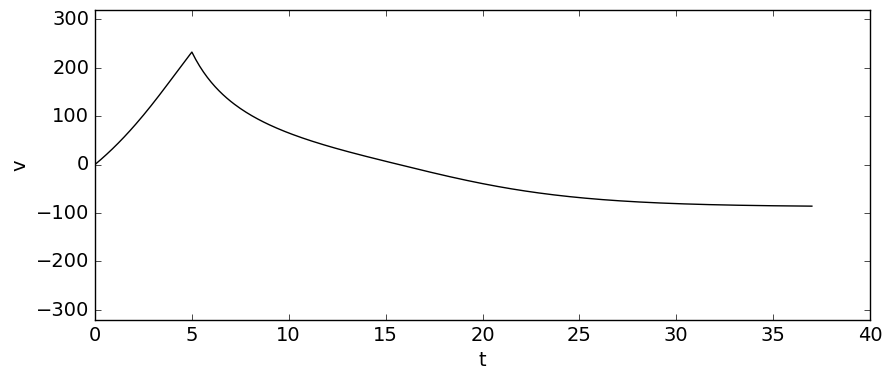

In [159]:
pyplot.figure(figsize=(10,4))   #set plot size
pyplot.ylim(-320,320)             #y-axis plot limits
pyplot.tick_params(axis='both', labelsize=14) #increase font size for ticks
pyplot.xlabel('t', fontsize=14) #x label
pyplot.ylabel('v', fontsize=14) #y label
pyplot.plot(t[0:n-1],v[0:n-1], 'k-')

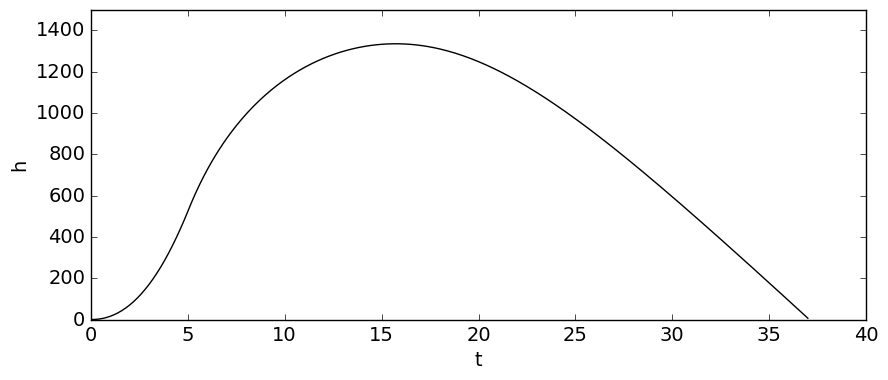

In [160]:
pyplot.figure(figsize=(10,4))   #set plot size
pyplot.ylim(0,1500)             #y-axis plot limits
pyplot.tick_params(axis='both', labelsize=14) #increase font size for ticks
pyplot.xlabel('t', fontsize=14) #x label
pyplot.ylabel('h', fontsize=14) #y label
pyplot.plot(t[0:n-1],h[0:n-1], 'k-')

$\textbf{Questions:}$


$\underline{Q1.}$ Quelle masse de carburant la fusée contient-elle à t = 3,2s ?

In [161]:
print (mass, 'kg')

36.0 kg


 $\underline{Q2.}$ 
 - Quelle est, arrondie à deux décimales, la vitesse maximale atteinte ? 

Le code suivant retrouve la vitesse maximale en comparant toutes les vitesses strictement positives de la liste v (on se dispense de comparer des vitesses négatives pour éviter de faire exécuter des tâches superflues à l'ordinateur). 

$\underline{N.B}$ : Il est évident que la vitesse sera maximale quand la masse de carburant passera à 0kg. Nous aurions pu trouver cette vitesse comme cela, mais nous optons pour une méthode applicable à un cas plus général d'objet envoyé en altitude qui retombe vers le sol. 

In [162]:
for j in range(0,n) :
    if v[j]>0:
        if v[j]>v[j-1]:
            vmax=v[j]
            tvmax=t[j]
            hvmax=h[j]
print (round(vmax,2), 'm/s')

232.11 m/s


- A quel instant cette vitesse est-elle atteinte ?

In [163]:
print (round(tvmax,2), 's')

5.0 s


- A quelle altitude est la fusée à cet instant ?

In [164]:
print (round(hvmax,2), 'm')

523.52 m



$\underline{Q3.}$ 
 - Quelle est, arrondie à deux décimales, l'altitude maximale atteinte ? 

De manière similaire à celui utilisé pour déterminer la vitesse maximale, Le code suivant retrouve l'altitude maximale en comparant toutes les altitude de la partie de la liste allant de h= 0 m à l'altitude à la même position que la première occurrence d'une vitesse négative (après ça, nous ne pouvons tomber sur une altitude plus élevée en parcourant la liste). 

In [165]:
for u in range(0,n) :
    if v[u-1]>0:
        if h[u]>h[u-1]:
            hmax=h[u]
            thmax=t[u]
print (round(hmax,2), 'm')

1334.18 m


- A quel instant cette altitude est-elle atteinte ?

In [166]:
print (round(thmax,2), 's')

15.7 s



$\underline{Q4.}$ 
 - A quel instant l'impact avec le sol a-t-il lieu ? 

La boucle qui a permis de construire nos listes de temps, vitesses et altitudes s'est arrêtée à la première occurrence d'un h négatif (au premier instant après l'impact). On doit donc prendre le temps en position [n-1] dans la list t.

In [167]:
print (round(t[n-1],2), 's')

37.1 s


- Quelle est la vitesse de l'engin au moment de l'impact ?

De même pour v :

In [168]:
print (round(v[n-1],2), 'm/s')

-86.01 m/s
